# **Titanic Dataset**

**Life cycle of Machine learning project**

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory data analysis
- Data pre-processing
- Model Training
- Choose best model

## **1) Problem statment**

This project is about the survival of the passengers from the Titanic ship based on their various features like age, gender, class etc.

## **2)Data collection**

- Dataset source - https://www.kaggle.com/competitions/titanic/data

## 2.1 Import Data and required packages

Importing pandas, numpy, seaborn, matplotlib and warnings libraries.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**1) Import the csv dataset.**

In [23]:
df = pd.read_csv(r'D:\Python\Titanic_comp\notebook\Data\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2) Shape of the Dataset**

In [24]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
df.shape

(891, 12)

# 2.2 Dataset information

- Passenger ID -> the ID for the each passenger.
- Survived -> (0,1) i.e. 0 - Not Survived and 1 - Survived
- Pclass -> (1,2,3) Passenger class
- Name -> passenger's Name
- Sex -> Gender of passenger (Male, Female)
- Age -> Age of the passenger
- SibSp -> count of Siblings / Spoue on the Titanic
- Parch -> count of parents / children on the Titanic
- Ticket -> Ticket number
- Fare -> Passenger fare
- Cabin -> Cabin number
- Embarked -> Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**3) Data checks to perform**

- Check missing values
- Check duplicate values
- Check the datatypes of features
- Check the number of unique values of each column
- check statistics of each feature
- Check various categories present in the different categorical column.

**3.1 Check missing values**

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are some missing values in Age and Cabin column which we have to handle
- Also there are only 2 missing values in Embarked column, which either can be neglected or can be handled.

In [28]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [29]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**The most frequent value in Embarked column is "S" and we have only 2 missing values in that column.Hence we will impute S value in the place of missing values**

In [30]:
df['Embarked'] = df['Embarked'].fillna('S')

In [31]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Now we will check the distribution of age column with .descibe() function

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above table interprets that we can fill missing values with the mean value of age.

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
df.drop('Cabin', axis=1, inplace=True)

In [45]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [48]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [49]:
df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)

In [50]:
df.shape

(891, 8)

In [52]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['Sex'].unique())

print("Categories in 'Embarked' variable:     ",end=" " )
print(df['Embarked'].unique())

Categories in 'sex' variable:      ['male' 'female']
Categories in 'Embarked' variable:      ['S' 'C' 'Q']


In [56]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 2 categorical features : ['Sex', 'Embarked']


In [57]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


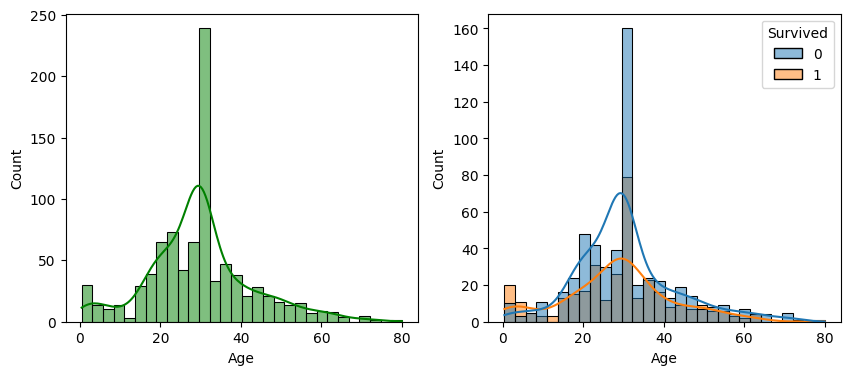

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Survived')
plt.show()

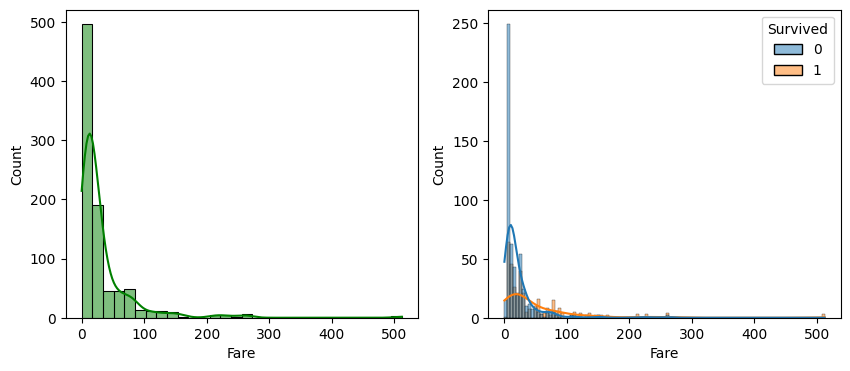

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='Fare',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Fare',kde=True,hue='Survived')
plt.show()

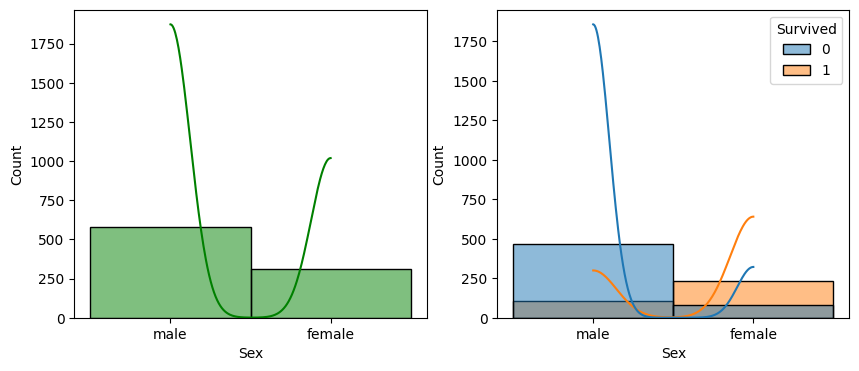

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='Sex',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Sex',kde=True,hue='Survived')
plt.show()

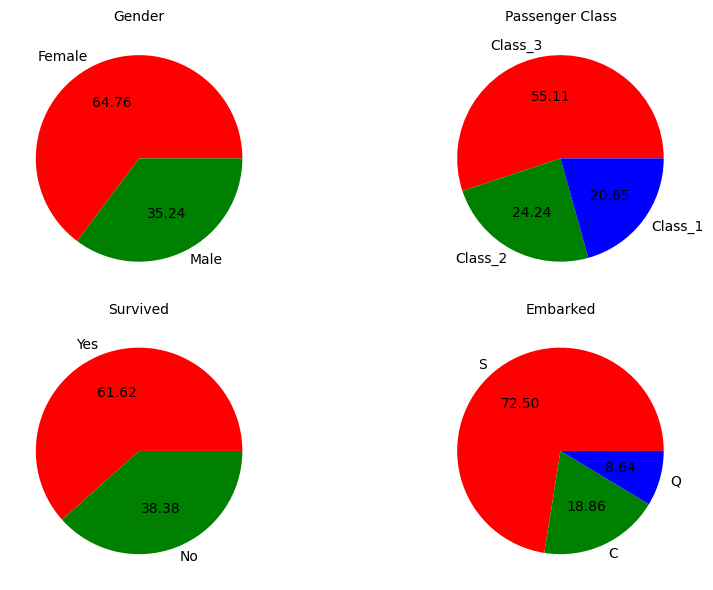

In [98]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.subplot(2, 2, 1)
size = df['Sex'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f')
plt.title('Gender', fontsize = 10)
plt.axis('off')



plt.subplot(2, 2, 2)
size = df['Pclass'].value_counts()
labels = ['Class_3', 'Class_2','Class_1']
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Passenger Class', fontsize = 10)
plt.axis('off')



plt.subplot(2, 2, 3)
size = df['Survived'].value_counts()
labels = 'Yes', 'No'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Survived', fontsize = 10)
plt.axis('off')


plt.subplot(2, 2, 4)
size = df['Embarked'].value_counts()
labels = 'S', 'C', 'Q'
color = ['red','green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Embarked', fontsize = 10)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

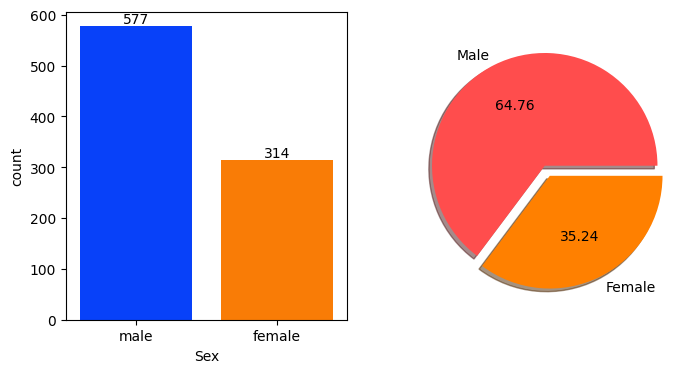

In [107]:
f,ax=plt.subplots(1,2,figsize=(8, 4))
sns.countplot(x=df['Sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['Sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%.2f',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

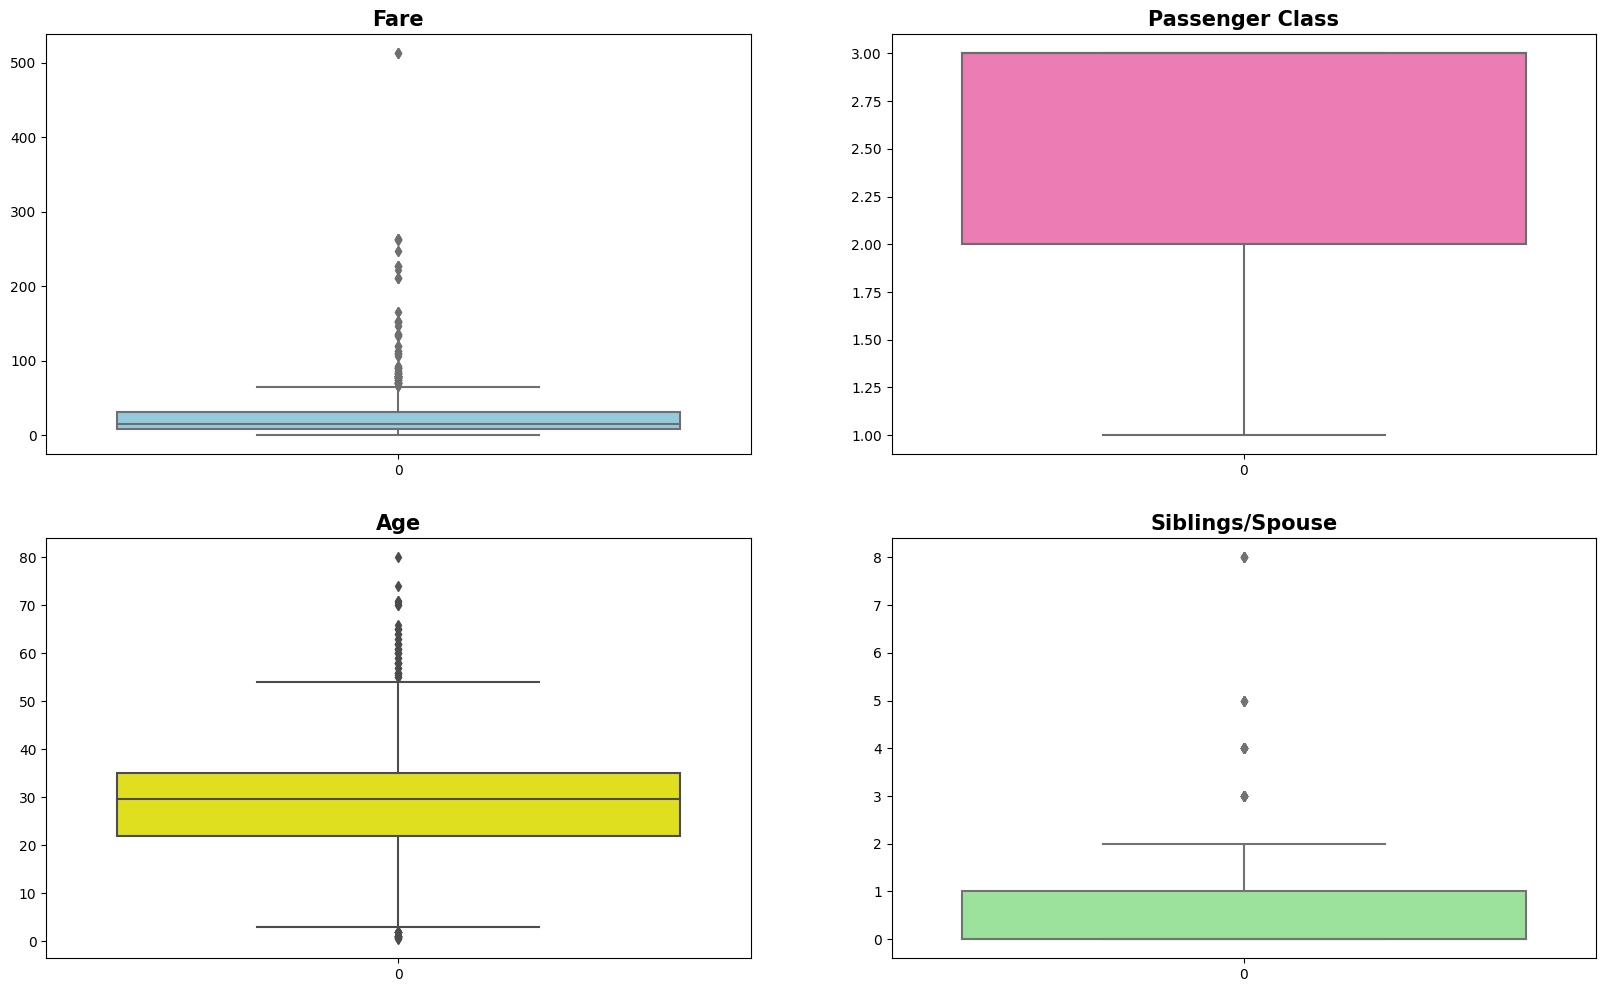

In [129]:
plt.subplots(1,4,figsize=(20,12))

plt.subplot(221)
sns.boxplot(df['Fare'],color='skyblue')
plt.title('Fare', fontweight = 'bold', fontsize = 15)

plt.subplot(222)
sns.boxplot(df['Pclass'],color='hotpink')
plt.title('Passenger Class', fontweight = 'bold', fontsize = 15)

plt.subplot(223)
sns.boxplot(df['Age'],color='yellow')
plt.title('Age', fontweight = 'bold', fontsize = 15)

plt.subplot(224)
sns.boxplot(df['SibSp'],color='lightgreen')
plt.title('Siblings/Spouse', fontweight = 'bold', fontsize = 15)
plt.show()


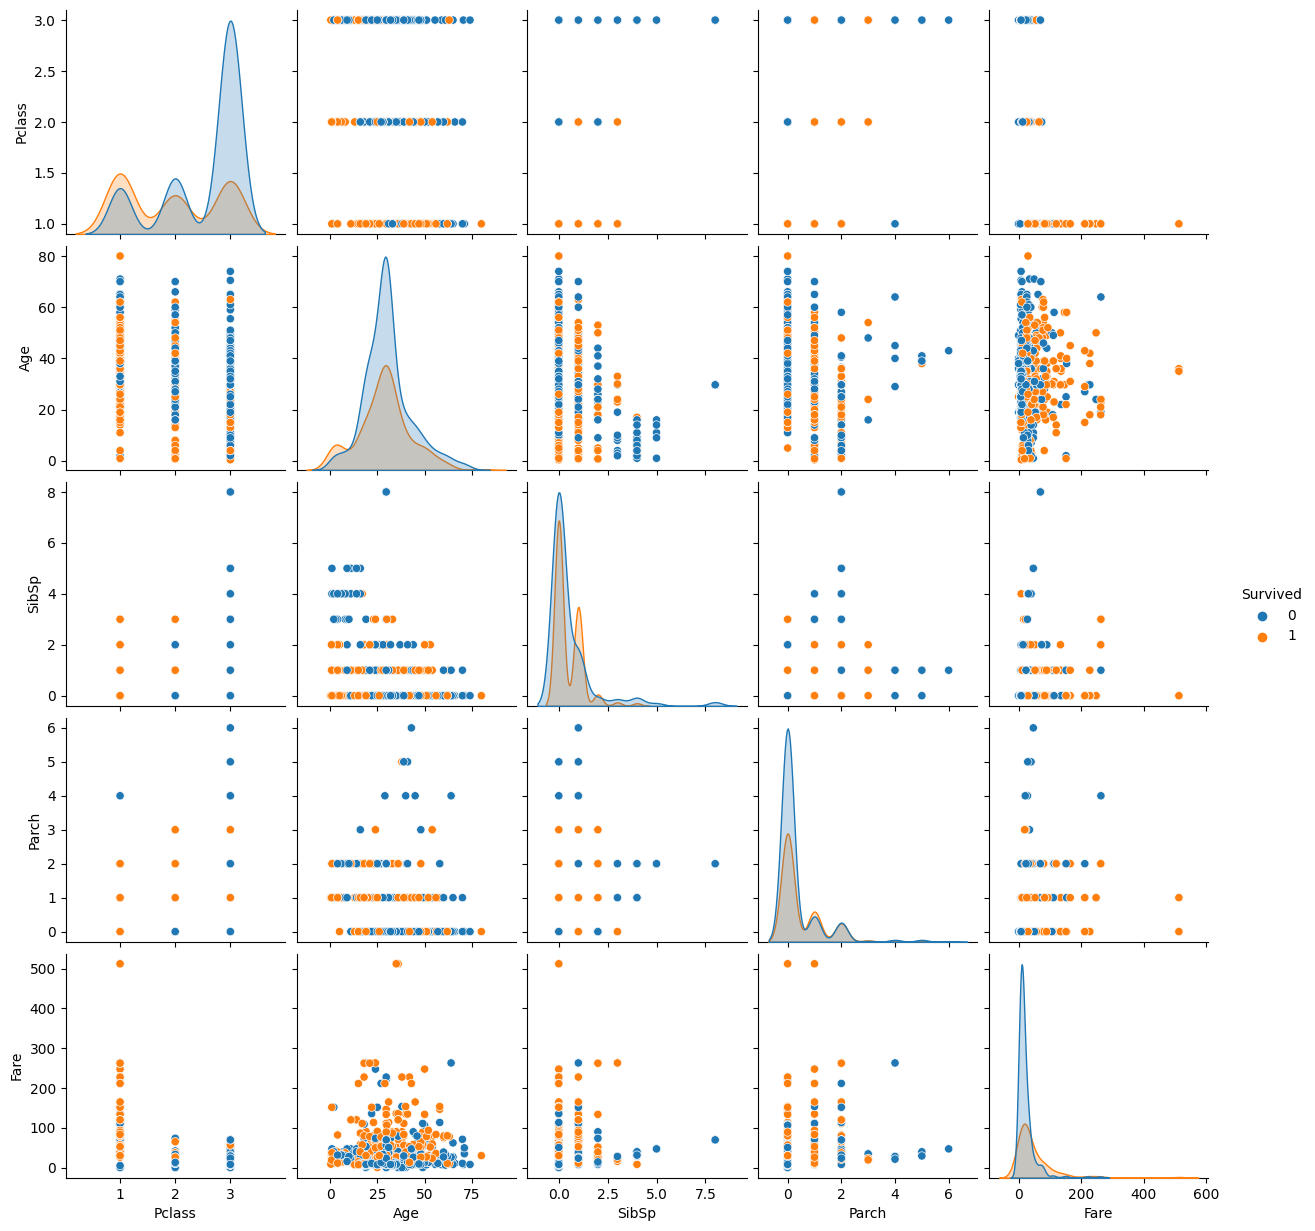

In [130]:
sns.pairplot(df,hue = 'Survived')
plt.show()